In [1]:
import librosa
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm_notebook as tqdm
%matplotlib notebook

In [2]:
note_table = pd.read_csv("../Utilities/Note_table.tsv", header=0, sep="\t")

In [76]:
def long_file_to_data(file, rs, k, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = y[np.argwhere(y >= 0.001)[0][0]:]
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame(columns=["x{}".format(i) for i in range(k)]+["Freq"])
    notes = list(note_table.iloc[37:72]["Note"])
    
    for i, note in zip(range(0, 16000*35, 16000), notes): # For every note in file
        x = np.array([])
        
        for t in range(0, len(y[i:i+16000])-k, k): # for every k sized chunk
            y_chunk = np.array([y[i+t:i+t+k]])

            if t != 0:
                x = np.concatenate((x, y_chunk))
            else:
                x = y_chunk
        
        x_std = np.std(x, axis=1)
        df = df.append(pd.DataFrame({**{"x{}".format(j): [x_std[j]] for j in range(k)}, 
                                     **{"Freq": [librosa.note_to_hz(notes[int(i/16000)])]}}))
    
    df = df.reset_index().drop("index", axis=1)
        
    return df

In [75]:
test = long_file_to_data("../Samples/Piano/PN_ab-ba_piano.mp3", 8000, 100, note_table)
test.head()

C#3


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,Freq
0,0.043727,0.073266,0.069190,0.063949,0.093223,0.066011,0.106222,0.094944,0.099070,0.100964,...,0.036523,0.035735,0.036502,0.033864,0.037767,0.035647,0.035712,0.034697,0.034512,138.591315
1,0.033551,0.055999,0.076129,0.073006,0.080537,0.098366,0.101779,0.081738,0.076838,0.073852,...,0.026444,0.026088,0.025351,0.024478,0.024043,0.023636,0.024192,0.023615,0.022082,146.832384
2,0.038934,0.065053,0.077639,0.068597,0.082103,0.096494,0.085806,0.071174,0.065645,0.063761,...,0.023940,0.023701,0.023459,0.023064,0.022592,0.022196,0.021596,0.020763,0.020611,155.563492
3,0.039167,0.071333,0.073304,0.071570,0.088069,0.096688,0.076791,0.071108,0.068729,0.073357,...,0.021292,0.021421,0.021265,0.020509,0.019952,0.019871,0.019555,0.019316,0.019065,164.813778
4,0.032132,0.066391,0.084256,0.083437,0.069042,0.068349,0.067842,0.063268,0.054155,0.055529,...,0.027480,0.027093,0.023979,0.024121,0.023873,0.024033,0.023769,0.025440,0.023747,174.614116


In [77]:
def dir_to_data(directory, rs, k, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(k)])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = long_file_to_data(directory + file, rs, k, note_table)
        data = data.append(df)
        
    data = data.reset_index().drop("index", axis=1)
    return data

In [78]:
data = dir_to_data("../Samples/Piano/", 8000, 100, note_table)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [79]:
data.sample(5)

,Freq,x0,x1,x10,x11,x12,x13,x14,x15,x16,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
174,987.766603,0.061413,0.050534,0.037344,0.034838,0.039836,0.037079,0.034089,0.040350,0.039372,...,0.020375,0.020496,0.020445,0.020401,0.019646,0.017397,0.016634,0.015048,0.013537,0.012187
412,659.255114,0.052972,0.041525,0.039696,0.038469,0.035725,0.038369,0.036444,0.037955,0.034751,...,0.007861,0.007848,0.007005,0.006469,0.005879,0.005623,0.006497,0.008940,0.010898,0.011102
127,493.883301,0.065784,0.056504,0.056324,0.051197,0.050423,0.041518,0.047480,0.055463,0.052695,...,0.025745,0.029013,0.030958,0.031014,0.030211,0.031894,0.033845,0.034903,0.033942,0.032491
615,440.000000,0.070042,0.130995,0.107211,0.112348,0.086775,0.091128,0.099677,0.104337,0.102358,...,0.019695,0.021461,0.021910,0.019342,0.017592,0.016816,0.013890,0.014608,0.013554,0.014282
582,493.883301,0.082304,0.102146,0.077165,0.077454,0.074645,0.068685,0.065486,0.062269,0.060658,...,0.006435,0.006412,0.006548,0.006706,0.006488,0.006571,0.006550,0.006486,0.006485,0.006485


In [80]:
data.shape

(700, 101)

In [81]:
def create_xy(df, target_column):
    return df.drop(target_column, axis=1), df[target_column]

def split_data(df, target_column):
    X_train, y_train = create_xy(df.sample(round(0.8*df.shape[0])), target_column)
    df = df.drop(X_train.index)
    X_val, y_val = create_xy(df.sample(round(0.5*df.shape[0])), target_column)
    df = df.drop(X_val.index)
    X_test, y_test = create_xy(df, target_column)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [82]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Freq")

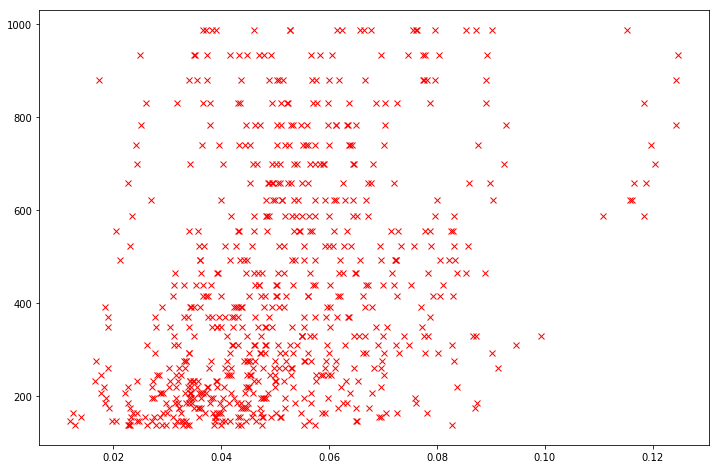

In [86]:
plt.figure(figsize=(12,8))
plt.plot(data["x0"], data["Freq"], 'rx')

In [88]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=200,
                          learning_rate=1,
                          depth=2)

In [91]:
model.fit(X_train, y_train)
preds = model.predict(X_val)

0:	learn: 221.5988770	total: 8.23ms	remaining: 1.64s
1:	learn: 209.4128153	total: 16.2ms	remaining: 1.61s
2:	learn: 194.4293266	total: 23.3ms	remaining: 1.53s
3:	learn: 189.9329127	total: 30.9ms	remaining: 1.51s
4:	learn: 186.9330869	total: 40.1ms	remaining: 1.56s
5:	learn: 181.2002877	total: 48.4ms	remaining: 1.56s
6:	learn: 178.3914019	total: 55.3ms	remaining: 1.52s
7:	learn: 166.6691509	total: 63.4ms	remaining: 1.52s
8:	learn: 163.7873304	total: 71.1ms	remaining: 1.51s
9:	learn: 161.9686987	total: 79.9ms	remaining: 1.52s
10:	learn: 161.3363086	total: 86.5ms	remaining: 1.49s
11:	learn: 158.4239463	total: 93.8ms	remaining: 1.47s
12:	learn: 156.2934955	total: 101ms	remaining: 1.45s
13:	learn: 154.9859161	total: 109ms	remaining: 1.44s
14:	learn: 150.9432669	total: 118ms	remaining: 1.45s
15:	learn: 149.8422089	total: 125ms	remaining: 1.43s
16:	learn: 147.9507241	total: 133ms	remaining: 1.44s
17:	learn: 147.3567573	total: 142ms	remaining: 1.43s
18:	learn: 147.2022308	total: 150ms	remainin

155:	learn: 96.7048982	total: 1.28s	remaining: 362ms
156:	learn: 96.5792456	total: 1.29s	remaining: 354ms
157:	learn: 96.5551112	total: 1.3s	remaining: 345ms
158:	learn: 96.4712530	total: 1.31s	remaining: 337ms
159:	learn: 96.4576527	total: 1.31s	remaining: 329ms
160:	learn: 96.4427294	total: 1.32s	remaining: 320ms
161:	learn: 96.4075180	total: 1.33s	remaining: 312ms
162:	learn: 96.3743759	total: 1.34s	remaining: 303ms
163:	learn: 96.2714727	total: 1.34s	remaining: 295ms
164:	learn: 96.2413600	total: 1.35s	remaining: 287ms
165:	learn: 96.2080650	total: 1.36s	remaining: 279ms
166:	learn: 96.1763905	total: 1.37s	remaining: 270ms
167:	learn: 96.1292040	total: 1.37s	remaining: 262ms
168:	learn: 95.8319116	total: 1.38s	remaining: 254ms
169:	learn: 95.8219943	total: 1.39s	remaining: 245ms
170:	learn: 95.7904229	total: 1.4s	remaining: 237ms
171:	learn: 95.7809306	total: 1.41s	remaining: 229ms
172:	learn: 95.6545108	total: 1.41s	remaining: 221ms
173:	learn: 95.3003921	total: 1.42s	remaining: 2

In [90]:
def accuracy(prediction, actual):
    return (np.array(librosa.hz_to_note(prediction)) == np.array(librosa.hz_to_note(actual))).mean()

In [92]:
accuracy(preds, y_val)

0.07142857142857142